<a href="https://colab.research.google.com/github/restful3/ds4th_study/blob/main/source/%EA%B0%9C%EB%B0%9C%EC%9E%90%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%8B%A4%EC%A0%84_%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99/ch03_%EB%B2%A1%ED%84%B0_%ED%8C%8C%ED%8A%B83_jeong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 벡터 응용 : 데이터분석에서의 벡터
> 벡터와 벡터연산이 데이터과학에서 어떻게 사용되는지 배운다


## 상관관계와 코사인 유사도
- 피어슨 상관관계와 코사인 유사도는 두 변수 사이에 선형관계를 반영한다.
  + 내적 기반 → 내적은 선형연산![e_01_11[1].png]()


### 상관관계
- 상관관계는 통계와 머신러닝에서 가장 중요한 분석
- 상관계수는 두 변수 사이의 선형관계를 정량화한 하나의 숫자로 -1 ~ +1

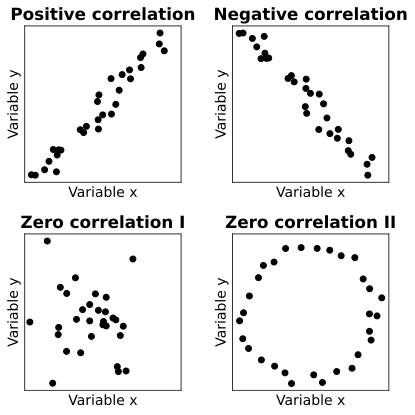

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size
_,axs = plt.subplots(2,2,figsize=(6,6))
# 30개 샘플
N = 30

# 선형
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)

# 3,4는 비선형
X = [x, x, np.random.randn(N), np.cos(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20]
Y = [y,-y,np.random.randn(N), np.sin(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20]
Name = ['Positive correlation','Negative correlation','Zero correlation I','Zero correlation II']

for i in range(4):
  a,b = i//2,i%2
  axs[a,b].plot(X[i],Y[i],'ko')
  axs[a,b].set_title(f'{Name[i]}',fontweight='bold')
  axs[a,b].set_xlabel('Variable x')
  axs[a,b].set_ylabel('Variable y')
  axs[a,b].set_xticks([])
  axs[a,b].set_yticks([])
  axs[a,b].axis('square')

plt.tight_layout()
plt.savefig('Figure_03_01.png',dpi=300) # write out the fig to a file
plt.show()

- 각 변수의 평균중심화
  + 각 데이터값에서 평균값 빼는것
- 백터노름 곱으로 내적 나누기
  + 분할 (diversive) 정규화는 측정단위를 제거하고 상관계수의 최대크기를 |1|로 조정

- 식1> 피어슨 상관계수 수학적 공식

 > $ρ=  \cfrac{\sum_{i=1}^{n}{(x_i -\bar{x})(y_i -\bar{y})}}{\sqrt{\sum_{i=1}^{n}{(x_i-x)^2}}\sqrt{\sum_{i=1}^{n}{(y_i-y)^2}}}$



- 식2> 선형 대수학 용어로 나타낸 피어슨 상관계수
 > $ρ=\cfrac{ \tilde{x}^{T}\tilde{y}}{\lVert \tilde{x} \rVert \lVert \tilde{y} \rVert}$
 - $ \tilde{x}$는  $x$를, $ \tilde{y}$는  $y$를 평균중심화 한 것
 > - 피어슨 상관계수는 <u>단지 변수의 크기로 정규화된 두 변수 사이의 내적</u>
 - $ \Vert x \Vert = \Vert y \Vert = 1$ 이 되도록 단위 정규화가 되어 있다면 상관관계는 두변수의 내적과 같음
  -  $ \Vert x \Vert = \sqrt{(x^Tx)} $

### 코사인 유사도
- 코사인 유사도의 공식은 단순히 내적의 기하학적 공식으로 코사인의 항을 구하는 것
> $cos(ϴ_{x,y}) = \cfrac{α}{\Vert x \Vert  \Vert y \Vert}$

  - α: 벡터내적


 - 코사인 유사도에는 정규화가 적용되어 있지 않음

> 상관관계와 코사인 유사도 차이
: 피어슨 관점에서 변수 [0,1,2,3]과 변수 [100,101,102,103]은 완벽한 상관관계 (ρ=1) 코사인유사도 (α=0.808)

In [2]:
import numpy as np
x = [0,1,2,3]
y = [100,101,102,103]

# 피어슨상관관계
xm, ym  = x-np.mean(x), y-np.mean(y)
num = np.dot(xm, ym) # 평균중심화의 내적
den = np.linalg.norm(xm) * np.linalg.norm(ym) #  평균중심화의 노름 곱
cor = num / den


# 코사인유사도
num = np.dot(x,y) # 내적
den = np.linalg.norm(x) * np.linalg.norm(y) # 노름 곱
cos = num / den

print(f"피어슨상관계수:{cor:.3f}, 코사인유사도:{cos:.3f}")

피어슨상관계수:1.000, 코사인유사도:0.808


## 시계열 필터링과 특징탐지


- 내적은 시계열 필터링에도 사용됨.
  + 필터링은 본질적으로 특징 탐지 기법으로 이 시계열 신호의 일부와 일치하는 특징을 찾음
  + 매끄러운 변동, 날카로운 엣지, 특정 파형 모양과 같은 특정 기준에 최적화 하도록 커널 구성
- 커널과 시계열 신호 사이의 내적을 계산하는 것이 필터링 메커니즘  
  + 지역(LOCAL)특징 탐지를 위한 커널은 전체시계열보다 짧음
  + 커널과 동일한 크기의 데이터 조각과 커널사이의 내적을 계산
  + 이 과정에서 필터링된 신로 구간에서 한 점이 생성되고 커널을 오른쪽으로 한구간 씩 이동시키며 다른 신호 조각과 내적을 계산 → 합성곱 (convolution)

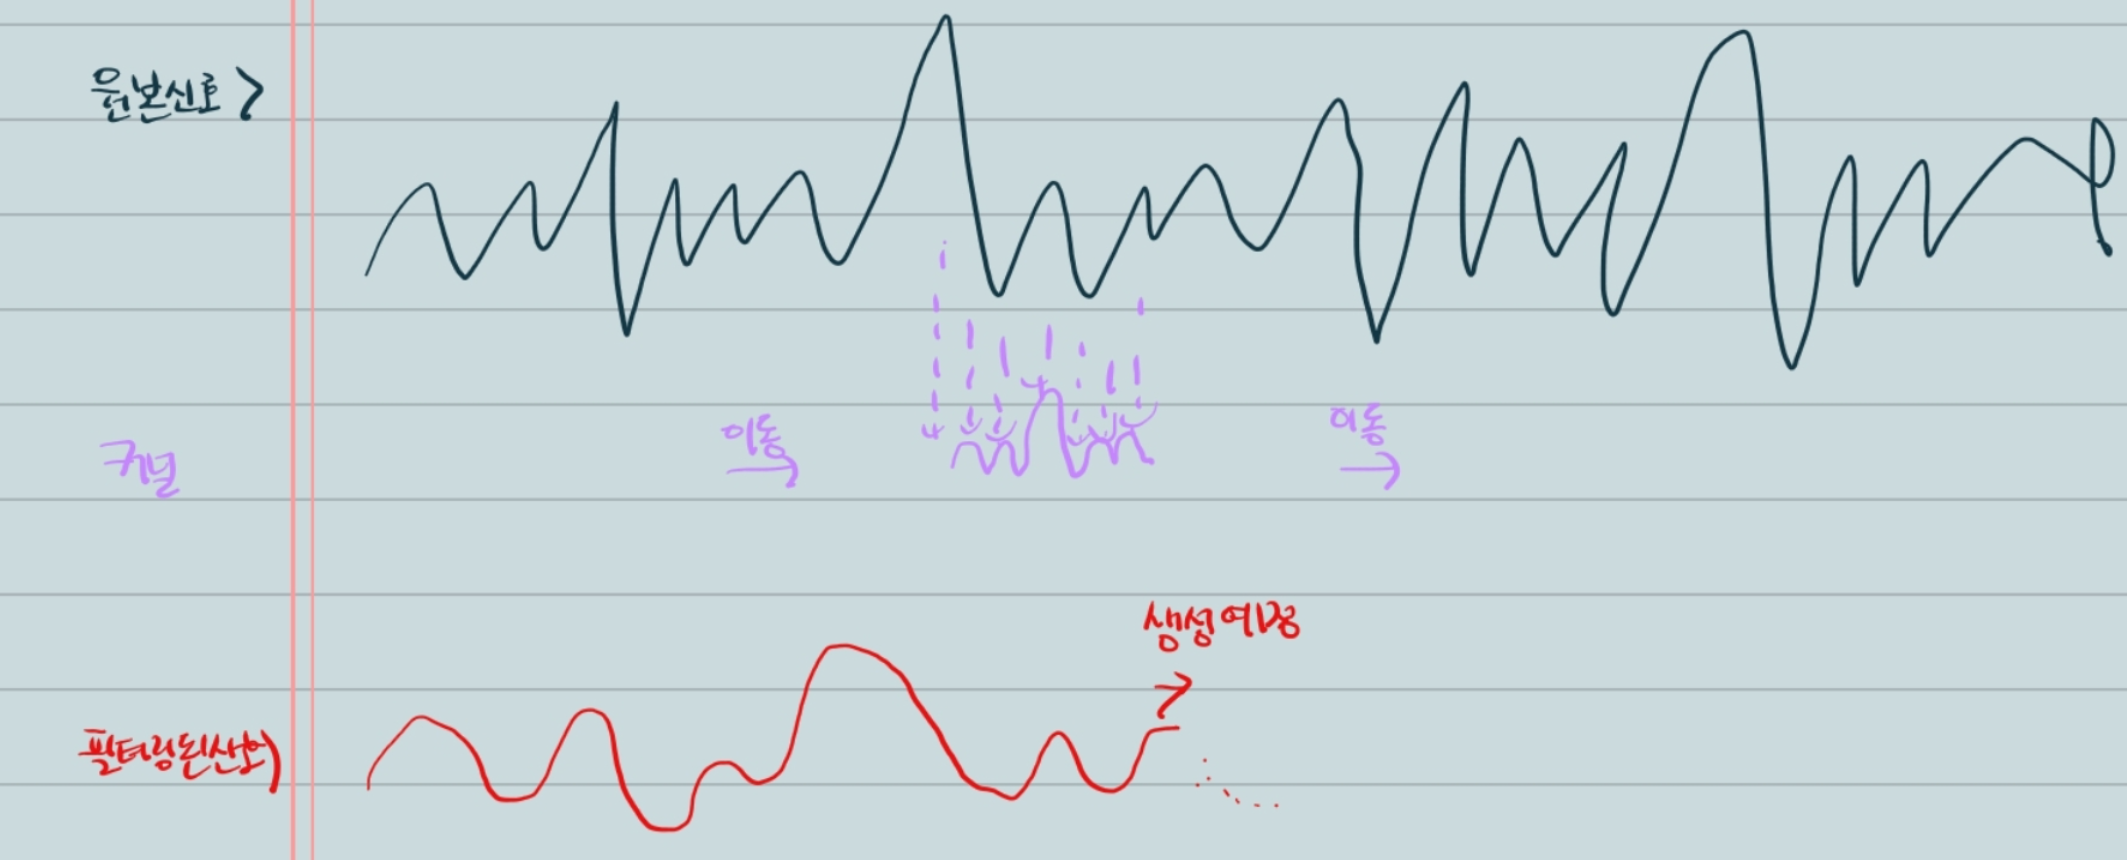

## K-평균 클러스터링
- k 평균 클러스터링은 그룹 중심까지의 거리를 최소화하도록 다변량 데이터를 상대적으로 적은 수(k)의 그룹 또는 범주로 분류하는 비지도 기법
- k평균 클러스터링이 구현을 확인하며, 백터 (특히 노름 및 브로드캐스팅)에 대한 개념이 k평균에서 어떻게 사용되는지
- 과정
  - 1. 데이터 공간에서 임의의 k개 중심점을 초기화, 중심은 클래스 또는 범주이며 다음단계에서 각 데이터관측치를 클래스에 할당 (중심은 임의의 차원수로 일반화된 형태)
  - 2. 각 데이터 관측치와 중심의 유클리드 거리 계산
  - 3. 각 데이터 관측치를 가장 가까운 중심의 그룹에 할당
  - 4. 각 중심을 해당 중심에 할당된 모든 데이터 관측치의 평균으로 갱신
  - 5. 수렴 기준을 만족할 때까지 또는 N회까지 2~4단계 반복

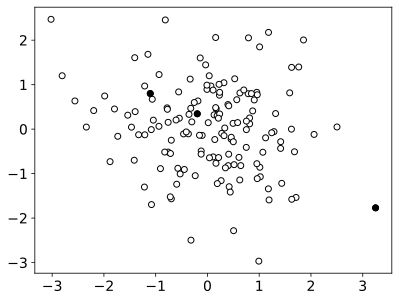

In [36]:
# 1. 데이터 공간에서 임의의 k개 중심점을 초기화
import numpy as np
import matplotlib.pyplot as plt

k = 3
data = np.random.randn(300).reshape(150,-1) # 2개 특성을 지닌 150개의 관측치 생성
ridx = np.random.choice(range(len(data)), k,replace=False)
centroids = data[ridx,:]
centroids

plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w' )
plt.plot(centroids[:,0],centroids[:,1],'ko')
plt.show()

In [41]:
# 2.각 데이터 관측치와 중심의 유클리드 거리 계산
dists = np.zeros((data.shape[0],k))
for ci in range(k):
  dists[:,ci] = np.sum((data-centroids[ci,:])** 2,axis=1)
dists[:10]

array([[3.28256512, 0.73718083, 0.53001691],
       [4.98607855, 1.33281699, 0.14246681],
       [1.66391917, 0.31762509, 1.47884091],
       [3.8004428 , 0.47697189, 2.63122141],
       [0.93728631, 3.87890076, 6.37781784],
       [1.87426418, 0.45366632, 1.30873643],
       [4.06738987, 1.24696912, 4.60984455],
       [1.3142805 , 0.24347534, 1.90699082],
       [0.399703  , 4.49548471, 9.84544658],
       [3.76888758, 0.27171306, 0.52806645]])

In [43]:
# 3. 각 데이터 관측치를 가장 가까운 중심의 그룹에 할당
groupidx = np.argmin(dists,axis=1)
groupidx

array([2, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 0, 2,
       0, 1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 2,
       1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1])

In [28]:
# 4. 각 중심을 해당 중심에 할당된 모든 데이터 관측치의 평균으로 갱신
# 5. 3회 반복
for ki in range(k):
  centroids[ki,:] = [np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1])
  ]
centroids

array([[ 0.67084277, -0.67156099],
       [ 0.15807617,  0.81682388],
       [-1.03165385, -0.46432104]])

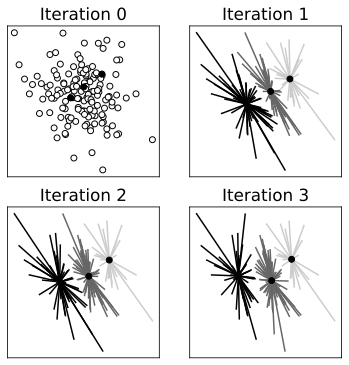

In [37]:
## 한번에 몰아서
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]

# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'

# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])


# loop over iterations
for iteri in range(k):
  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)

  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]


  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


plt.savefig('Figure_03_03.png',dpi=300)
plt.show()


# 연습문제

## Exercise 1
- 두 벡터를  입력으로 받아 피어슨 상관계수와 코사인 유사도를 출력하는 파이썬 함수를 작성합니다.
- 변수들이 이미 평균중심화 되어있다면 두 출력결과가 동일하고, 그렇지 않다면 결과가 서로 다른지 확인합니다.

In [18]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def corrAndCosine(x,y):

  # compute correlation (similar to above but mean-centered!)
  xm, ym  = x-np.mean(x), y-np.mean(y)
  num = np.dot(xm,ym) # numerator
  den = np.linalg.norm(xm) * np.linalg.norm(ym) # denominator
  cor = num / den

  # compute cosine similarity
  num = np.dot(x,y) # numerator
  den = np.linalg.norm(x) * np.linalg.norm(y) # denominator
  cos = num / den

  return cor, cos

# 테스트 및 비교
a = np.random.randn(15)
b = np.random.randn(15)
cor, cos = corrAndCosine(a,b)

print(cor, np.corrcoef(a,b)[0,1])
print(cos, cosine_similarity(a.reshape(1,-1),b.reshape(1,-1))[0][0])

0.09069124292450818 0.09069124292450825
0.07417764160966675 0.0741776416096668


In [19]:
# 두개의 변수가 평균중심화 없이 상관계수와 코사인유사도 비교
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# 평균중심화
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)

# show the results with and without mean-centering
print('평균중심화 없는경우 :')
print( np.round(corrAndCosine(a,b),4) )
print(' ')

print('평균중심화 있는경우:')
print( np.round(corrAndCosine(aNoMean,bNoMean),4) )

# NOTE: In the printing code above, I rounded to 4 significant digits just for visual clarity.

평균중심화 없는경우 :
[0.2344 0.0794]
 
평균중심화 있는경우:
[0.2344 0.2344]


## Exercise 2
- 0~3 까지의 정수를 가진 변수와 이 변수에 특정 오프셋을 더한 두번째 변수를 만듭니다.
- 시스템적으로 오프셋을 -50부터 +50까지 변경하는 시뮬레이션을 만듭니다.
- for 루프에서 두 변수 간 상관관계 계산하고 저장
- 평균 오프셋이 상관관계와 코사인 유사성에 어떻게 영향을 주는지 보여주는 선그래프를 그림

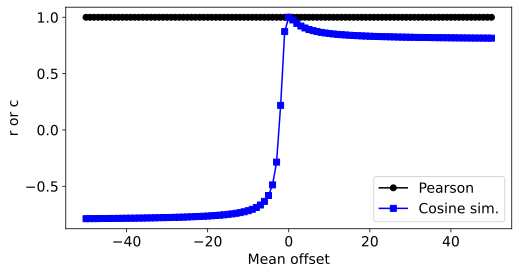

In [20]:
import matplotlib.pyplot as plt


# create the variables
a = np.arange(4,dtype=float)
offsets = np.arange(-50,51)

# initialize the results
results = np.zeros((len(offsets),2)) # 2개의 변수를 저장해야하므로 offset수 (100개) 만큼의 프레임 생성

# run the simulation!
for i in range(len(offsets)):
    results[i,:] = corrAndCosine(a, a + offsets[i]) # 변수 1, 변수2 사이의 cor, cos를 저장


# plot the results!
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color('b')
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Pearson','Cosine sim.'])
plt.savefig('Figure_03_02.png',dpi=300) # write out the fig to a file
plt.show()

## Exercise 3
- 피어슨 상관계수를 계산하는 여러 파이썬 함수 존재
- scipy.stats의 pearsonr을 확인하자

In [21]:
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

## Exercise 4
- 직접 작성한 함수가 훨씬 빠름, 넘파이가 제일 빠름

In [22]:
# a bare-bones correlation function
def rho(x,y):
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  n  = np.dot(xm,ym)
  d  = np.linalg.norm(xm) * np.linalg.norm(ym)
  return n/d


# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock my custom-written function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  y1= rho(x[:,0],x[:,1])
t1 = time.time() - tic


# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
  # x = np.random.randn(varLength,2)
  y2= pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic


tic = time.time()
for i in range(numIters):
  # x = np.random.randn(varLength,2)
  y3= np.corrcoef(x[:,0],x[:,1])
t3 = time.time() - tic


# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms, 결과는 {y1}')
print(f'   pearsonr took {t2*1000:.2f} ms, 결과는 {y2[0]}')
print(f'   numpy {t3*1000:.2f} ms, 결과는 {y3[0,1]}')


My function took 67.47 ms, 결과는 -0.005658791707501118
   pearsonr took 1019.36 ms, 결과는 -0.005658791707501127
   numpy 97.78 ms, 결과는 -0.005658791707501106


## Exercise 5

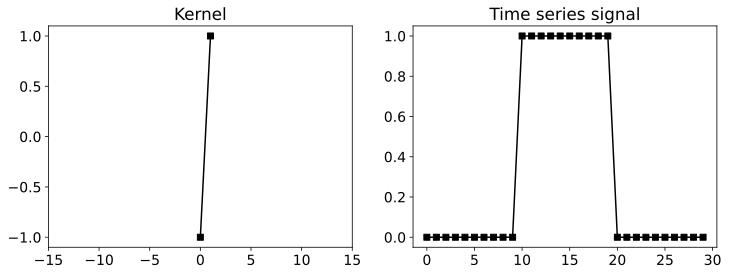

In [23]:
# create the kernel (in the book figure I used +1.5)
kernel = np.array([-1,1])

# and the "signal" (a plateau)
signal = np.zeros(30)
signal[10:20] = 1


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_04ab.png',dpi=300)
plt.show()

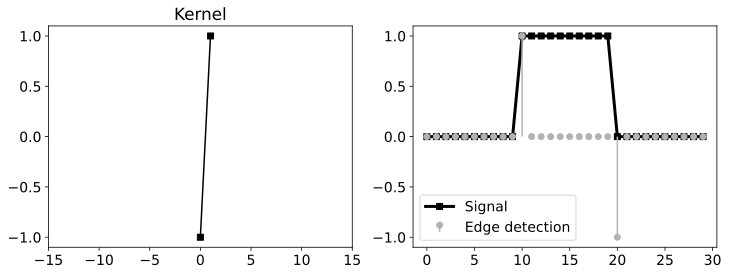

In [24]:
# initialize the feature map as zeros
featureMap = np.zeros(len(signal))

# loop over the signal and do template-matching (via dot products!)
for t in range(1,len(signal)-1):
  featureMap[t] = np.dot(kernel,signal[t-1:t+1])


# plot the result
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])


axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs[1].stem(range(len(featureMap)),featureMap,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')

plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs[1].legend()
plt.savefig('Figure_03_04c.png',dpi=300)
plt.show()

## Exercise 6
- 울퉁불퉁한 시계열을 매끄럽게 만들어보자
- 매끄러운 형태로 바꾸는 필터를 저주파필터라고 함

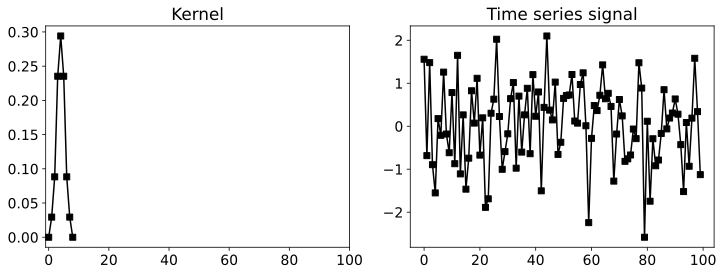

In [25]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2


# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_06ab.png',dpi=300)
plt.show()

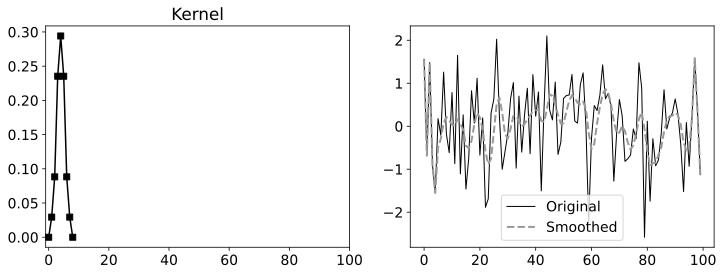

In [26]:
# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.savefig('Figure_03_06c.png',dpi=300)
plt.show()

## Exercise 7
- 커널 중앙의 1을 -1로 바꾸고 커널을 중앙평균화 → 다시 필터링 하고 그래프 생성
- 낮은 주파수의 특징을 감쇄하고 더 빠르게 변화하는 고주파 필터 만들자

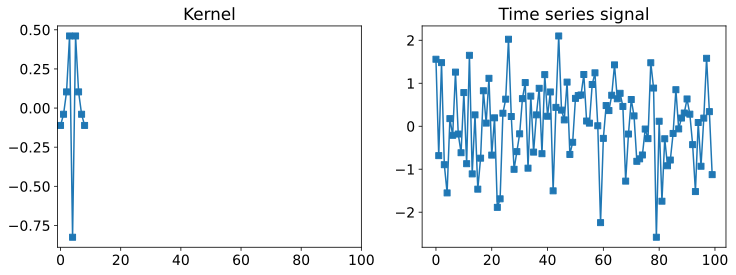

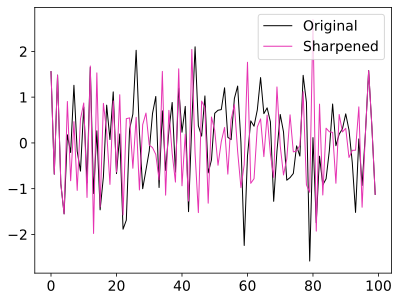

In [27]:
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()

# loop over the signal time points
filtsig2 = timeseries.copy()
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])

plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

## Exercise 8
- k평균 연습문제
- 새로운 데이터를 생성하지 않고 k =3을 사용하여 k-평균 코드를 여러번 실행하고 클러스터 결과가 유사한지 확인

In [ ]:
## Create data
nPerClust = 50

# blur around centroid (std units)
blur = 1

# XY centroid locations
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# concatanate into a matrix
data = np.transpose( np.concatenate((a,b,c),axis=1) )


# plot data
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

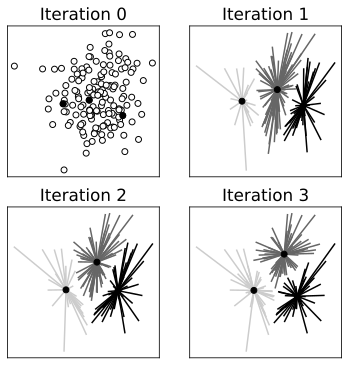

In [16]:
## initialize random cluster centroids
k = 3 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):

  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)

  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]


  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


plt.savefig('Figure_03_03.png',dpi=300)
plt.show()

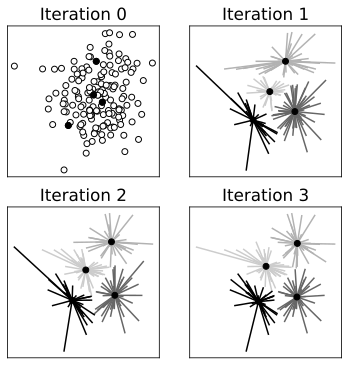

In [15]:
## initialize random cluster centroids
k = 4 # extract three clusters

# random cluster centers (randomly sampled data points)
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]


# setup the figure
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.7,.7,.7],[.8,.8,.8] ]#'rbm'


# plot data with initial random cluster centroids
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# loop over iterations
for iteri in range(3):

  # step 1: compute distances
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)

  # step 2: assign to group based on minimum distance
  groupidx = np.argmin(dists,axis=1)

  # step 3: recompute centers
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]


  # plot data points
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


plt.savefig('Figure_03_04.png',dpi=300)
plt.show()